<a href="https://colab.research.google.com/github/salonisuman06/Predicting_Sleep_disorders_Apnea/blob/main/Sleep_disorder_Apnea.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import numpy as np
import pandas as pd
import os
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.stats import kurtosis, skew
import scipy.io
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier

In [35]:
df = pd.read_csv('/content/a02.csv')
df.columns =['Sample', 'ECG']
# print(df) #[2956999 rows x 2 columns]

In [36]:
df

,Sample,ECG
0,1,-0.065
1,2,-0.060
2,3,-0.075
3,4,-0.065
4,5,-0.070
...,...,...
1048569,1048570,-0.265
1048570,1048571,-0.165
1048571,1048572,-0.150
1048572,1048573,-0.105


In [37]:
df.shape

(1048574, 2)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048574 entries, 0 to 1048573
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   Sample  1048574 non-null  int64  
 1   ECG     1048574 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 16.0 MB


In [39]:
df.describe

<bound method NDFrame.describe of           Sample    ECG
0              1 -0.065
1              2 -0.060
2              3 -0.075
3              4 -0.065
4              5 -0.070
...          ...    ...
1048569  1048570 -0.265
1048570  1048571 -0.165
1048571  1048572 -0.150
1048572  1048573 -0.105
1048573  1048574 -0.170

[1048574 rows x 2 columns]>

In [40]:
df.isnull()

,Sample,ECG
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
1048569,False,False
1048570,False,False
1048571,False,False
1048572,False,False


In [41]:
#sum of all null values
df.isnull().sum()

Sample    0
ECG       0
dtype: int64

In [42]:
df1 = pd.read_csv('/content/a02.txt', delimiter= ',', index_col=False)
df1Arr = df1.loc[:,'N']
# print(df)

In [43]:
df1Arr

0      N
1      N
2      N
3      N
4      N
      ..
483    A
484    A
485    A
486    A
487    A
Name: N, Length: 488, dtype: object

In [44]:
#module for data signals synchronization with labels
yArr = []
ldata=len(df)
i = 0
for x in df1Arr:
    for k in range(0,6060):
        yArr.append(x)
        i+=1

df_y = pd.DataFrame(yArr)
df = pd.concat([df, df_y], axis=1)

df = df[:ldata  ]
df.rename(columns = {0 : 'Target'}, inplace = True)
df["Target"].replace({"A": 1, "N": 0}, inplace=True)

y = df.values[:ldata   , 2]


df = df.values[:ldata    , 1]
x = df

k = 6000
step = 3000
n = len(x)

# max, min, median, mean, std, kurtosis, skw, target
dfk = pd.DataFrame(columns=['max', 'min', 'median', 'mean', 'std', 'kts', 'skw', 'target'])
kk = 0
# count = 0

window = x[0:0 + k]
peaks, _ = find_peaks(window, distance=150) #to finds r_peaks and finds all local maxima by
# simple comparison of neighbouring values
for i in range(0, n - k + 1, step): #to iterate within all window segments
     # count =count+1
     window = x[i:i + k]
     windowY = y[i:i + k]
     peaks, _ = find_peaks(window, distance=150) #to finds r_peaks and finds all local maxima by
    # simple comparison of neighbouring values
     ecg_peaks = window[peaks] #to get amplitude information
     max_index = np.where(ecg_peaks == np.amax(ecg_peaks))
     windowPeakIdx = peaks[max_index[0]]

    # print(x[25])
    # plt.plot(x)
     #plt.plot(peaks, x[peaks], ".")
     #plt.plot(np.zeros_like(x), "--", color="gray")
     #plt.show()

     if ecg_peaks.size == 0:
      kk += 1
      continue

    # The electrocardiogram in millivolt (mV) sampled at 100 Hz.

     fs = 100
    # np.diff(peaks)
     ecg_sample_time = peaks / fs #sampling data converted into time domain data
     # print(ecg_sample_time)
     ecg_sample_time_interval = [ecg_sample_time[i + 1] - ecg_sample_time[i] for i in range(len(ecg_sample_time) - 1)] #time interval between a signal and its previous signal
     # print(ecg_sample_time_interval)

    #  feature extraction for every window segment
     G = max(window[peaks])
     dfk.at[kk, 'max'] = G #maximum of r_peaks
     # print(G)
     L = min(window[peaks]) #minimum of r_peaks
     dfk.at[kk, 'min'] = L
     # print(L)
     mean= np.mean(ecg_sample_time_interval) #mean of r_peaks
     dfk.at[kk,'mean'] = mean
     # print(mean)
     median= np.median(ecg_sample_time_interval) #median of r_peaks
     dfk.at[kk,'median'] = median
     # print(median)
     std= np.std(ecg_sample_time_interval) #std deviation of r_peaks
     dfk.at[kk,'std'] = std
     # print(std)
     kts= kurtosis(ecg_sample_time_interval, fisher=True) #kurtosis of r_peaks
     dfk.at[kk,'kts'] = kts
     # print(kts)
     skw= skew(ecg_sample_time_interval) #skwewness of r_peaks
     dfk.at[kk,'skw'] = skw
     # print(skw)

     dfk.at[kk,'target'] = windowY[windowPeakIdx][0]
     kk+=1
# print(dfk)
dfk

,max,min,median,mean,std,kts,skw,target
0,1.75,1.325,1.92,2.089286,0.396403,-1.109462,0.735785,0.0
1,1.745,1.325,1.8,2.014483,0.388335,-1.104825,0.803854,0.0
2,1.74,1.315,1.75,2.024483,0.457886,-1.292131,0.593586,0.0
3,1.75,1.225,1.85,2.082143,0.443044,-1.312812,0.417376,0.0
4,1.75,0.185,1.85,2.043103,0.425588,-0.92004,0.613994,0.0
...,...,...,...,...,...,...,...,...
343,1.915,0.03,1.715,1.980667,0.497466,-0.668573,0.798659,1.0
344,2.065,0.03,1.705,1.842188,0.368873,1.384907,1.435052,1.0
345,2.065,0.025,1.65,1.737059,0.278711,3.516229,1.864248,1.0
346,1.96,0.025,1.665,1.84375,0.383917,0.608487,1.207779,1.0


In [45]:
dft = np.transpose(dfk)
# print(dft.shape)
#plt.boxplot(dft)
#plt.xlabel('feature')
#plt.ylabel('value')
#plt.show()

x1 = dft.iloc[0:6,:]

y1 = dft.iloc[7,:]
y1= y1.astype(int)
# print(y1.value_counts())

x1 = np.transpose(x1)

In [59]:
from sklearn import preprocessing

# normalize the data attributes
x1 = preprocessing.normalize(x1)

x_train_all, x_test, y_train_all, y_test = train_test_split(x1, y1,
                                                            test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all, stratify=y_train_all,
                                                  test_size=0.2, random_state=42)
print("data train:\r\n", y_train.value_counts())
print("data Test:\r\n",y_test.value_counts())

data train:
 1    206
0     16
Name: target, dtype: int64
data Test:
 1    66
0     4
Name: target, dtype: int64


In [60]:
from sklearn.tree import DecisionTreeClassifier
# instantiate the DecisionTreeClassifier model with criterion gini index

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)


# fit the model
clf_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [62]:
y_pred_gini = clf_gini.predict(x_test)
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.9571


In [63]:
y_pred_train_gini = clf_gini.predict(x_train)

y_pred_train_gini

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [64]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.9595


In [65]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_gini.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(x_test, y_test)))

Training set score: 0.9595
Test set score: 0.9571


In [66]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_gini)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[ 2  2]
 [ 1 65]]


In [67]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_gini))

              precision    recall  f1-score   support

           0       0.67      0.50      0.57         4
           1       0.97      0.98      0.98        66

    accuracy                           0.96        70
   macro avg       0.82      0.74      0.77        70
weighted avg       0.95      0.96      0.95        70



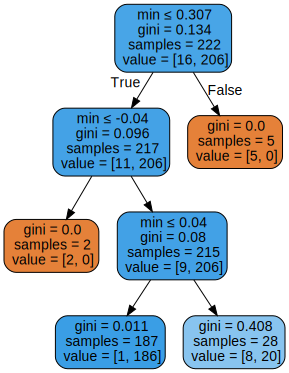

In [68]:
#download dan Install Terlebih dahulu GraphVis  https://graphviz.org/download/
import graphviz
from sklearn import tree
dot_data = tree.export_graphviz(clf_gini, out_file=None,
                              feature_names=['max', 'min', 'median', 'mean', 'std', 'kts'],
                              #class_names=y_train,
                              filled=True, rounded=True,
                              special_characters=True)

graph = graphviz.Source(dot_data)

graph